# U.S. Medical Insurance Costs

What I would like to discover through this project are:
1. Do age and smoking has affected the increasing of BMI
2. Which group-age is supposed to smoke more?
3. Does the smoking related to the increasing cost of life (charges)?
4. Which region has the highest charges (cost of life), more smokers and highest BMI?
5. What is the difference/ratio between male smokers and female smokers

In [45]:
import pandas as pd
import numpy as np
import seaborn as snb

In [46]:
df = pd.read_csv ("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [47]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [57]:
print (len(df['age'])) # to check the lenght of the dataset

1338


In [55]:
#We will check for duplciates and the nan-value
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [56]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
# sa NaN ka në çdo kolonë
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [59]:
#1.  Do age and smoking has affected the increasing of BMI
df.groupby(["smoker", "age"])["bmi"].mean()



smoker  age
no      18     31.701228
        19     27.653500
        20     31.591750
        21     28.525000
        22     29.371136
                 ...    
yes     60     35.484000
        61     32.640833
        62     28.968750
        63     31.942000
        64     29.939286
Name: bmi, Length: 94, dtype: float64

<Axes: xlabel='smoker', ylabel='bmi'>

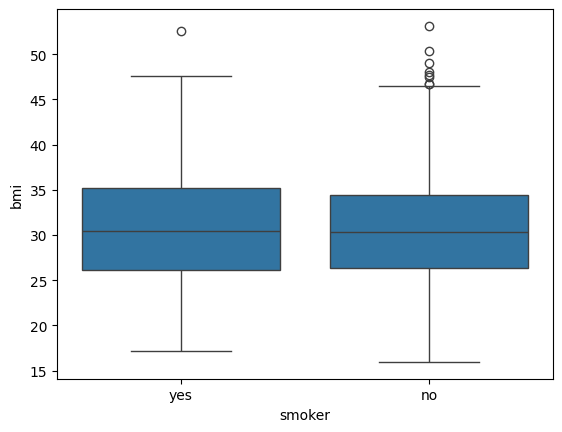

In [60]:
import seaborn as sns
sns.boxplot(x="smoker", y="bmi", data=df)

In [61]:
df["age_group"] = pd.cut(df["age"], bins=[18,30,40,50,60,70], labels=["18-29","30-39","40-49","50-59","60+"])
df.groupby("age_group")["smoker"].value_counts(normalize=True)


C:\Users\flori\AppData\Local\Temp\ipykernel_10476\1468388114.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["smoker"].value_counts(normalize=True)


age_group  smoker
18-29      no        0.778667
           yes       0.221333
30-39      no        0.789883
           yes       0.210117
40-49      no        0.782918
           yes       0.217082
50-59      no        0.841509
           yes       0.158491
60+        no        0.758242
           yes       0.241758
Name: proportion, dtype: float64

In [62]:
df.groupby("age")["smoker"].value_counts(normalize=True)


age  smoker
18   no        0.826087
     yes       0.173913
19   no        0.735294
     yes       0.264706
20   no        0.689655
                 ...   
62   yes       0.173913
63   no        0.782609
     yes       0.217391
64   no        0.681818
     yes       0.318182
Name: proportion, Length: 94, dtype: float64

### 3


In [63]:
df.groupby("smoker")["charges"].mean()


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

<Axes: xlabel='smoker', ylabel='charges'>

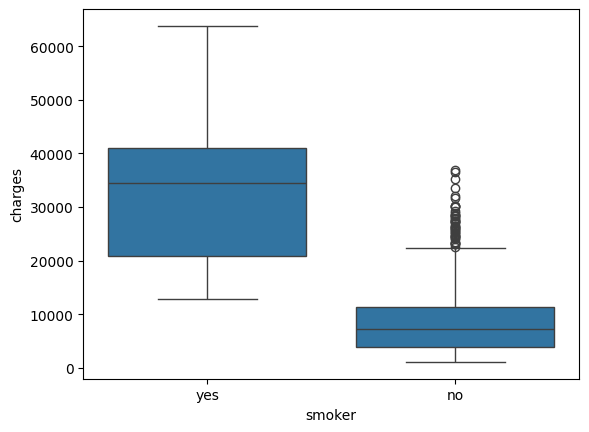

In [64]:
sns.boxplot(x="smoker", y="charges", data=df)


In [65]:
#4
# mesatarja e kostove sipas rajonit
df.groupby("region")["charges"].mean()

# përqindja e duhanpirësve sipas rajonit
df.groupby("region")["smoker"].value_counts(normalize=True)

# mesatarja e BMI sipas rajonit
df.groupby("region")["bmi"].mean()


region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [66]:
#5
df.groupby("sex")["smoker"].value_counts(normalize=True)


sex     smoker
female  no        0.826284
        yes       0.173716
male    no        0.764793
        yes       0.235207
Name: proportion, dtype: float64